# Graph Visualizations

Need to clean this up. But basically this is a visualization of who tags who and shows off any communities (groups that tag eachother a lot) in a nice graph

TODO: Display how many times each account tweeted an @ 

In [150]:
len(set(list(tweets.extended_tweet_cleaned)))

14202

In [6]:
import pandas as pd
import urllib.request
import ast
import pandas as pd 

target_url="https://swift-yeg.cloud.cybera.ca:8080/v1/AUTH_233e84cd313945c992b4b585f7b9125d/geeky-summit/tweets_cleaned.csv"
file_name="tweets_cleaned.csv"
urllib.request.urlretrieve(target_url, file_name)

tweets = pd.read_csv(file_name,parse_dates=['created_at_date']) 
tweets.head()

,created_at_date,hashtags_string,user_string,user_location,lang,longitude,latitude,name,screen_name,extended_tweet,extended_tweet_cleaned
0,2018-11-02 21:01:56,,Symin16,Toronto ✈ Calgary,en,NaN,NaN,♠,jessmayumba85,@Symin16 I’d like to know who,I’d like to know who
1,2018-11-02 21:02:01,,TwoCanSamAdams,YYC,en,NaN,NaN,hannahrae cuddleslug,thimblewad,@TwoCanSamAdams Legit. There are still chunks ...,Legit. There are still chunks in the sink an...
2,2018-11-02 21:02:05,job Calgary SupplyChain Hiring CareerArc,,Calgary,en,51.004583,-114.007914,TMJ - CAL Manuf Jobs,tmj_cal_manuf,Can you recommend anyone for this #job in #Cal...,"Can you recommend anyone for this in , AB? ..."
3,2018-11-02 21:02:10,,,🌎📱,en,NaN,NaN,Sunny Rai,TheSunsRay,Kids See Ghosts: love this track,Kids See Ghosts: love this track
4,2018-11-02 21:02:13,Calgary job,,Calgary,en,50.997882,-114.074005,TMJ-CAL Retail Jobs,tmj_cal_retail,"See our latest #Calgary, AB #job and click to ...","See our latest , AB and click to apply: bar..."


In [142]:
import networkx as nx
import matplotlib.pyplot as plt

def gen_network(row):
    user = row.screen_name
    tagged = row.user_string
    if tagged != ' ':
        return {user: set(tagged.split(' '))}
    else:
        return None

In [143]:
tweets['tagdict']= tweets.apply(gen_network, axis=1)

In [141]:
tags = list(tweets[tweets.tagdict.notnull()].tagdict)
result = {}
for d in tags:
    result.update(d)
g= nx.from_dict_of_lists(result)

a=sorted(g.degree, key=lambda x: x[1], reverse=True)
a


[('calgarylibrary', 31),
 ('NHLFlames', 26),
 ('calgarytransit', 24),
 ('nenshi', 14),
 ('cityofcalgary', 13),
 ('realDonaldTrump', 13),
 ('Crackmacs', 11),
 ('YouTube', 11),
 ('sait', 10),
 ('TerryAndryo', 10),
 ('mikesbloggity', 10),
 ('drfinchy', 9),
 ('seanchucalgary', 9),
 ('TourismCalgary', 9),
 ('TwetKat', 9),
 ('kbellPR', 9),
 ('Brutiny', 9),
 ('ailsa_graham', 8),
 ('ratzlaff', 8),
 ('gccarra', 8),
 ('aggieloveseggs', 8),
 ('maryhmoran', 8),
 ('YYCGames2026', 8),
 ('JustinTrudeau', 8),
 ('jennorrie', 7),
 ('bhopps83', 7),
 ('Neil_Zee', 7),
 ('flyforapsychguy', 7),
 ('keithcalscot', 7),
 ('SageLikeFool', 7),
 ('CIS_Group', 7),
 ('yescalgary2026', 7),
 ('TELUS', 7),
 ('PechaKuchaYYC', 7),
 ('lisa_m_228', 6),
 ('SaraJPeden', 6),
 ('DandyAlesYYC', 6),
 ('evilstevetsuida', 6),
 ('VincentRule', 6),
 ('StampOutriders', 6),
 ('distill_ista', 6),
 ('calstampeders', 6),
 ('chefLiana', 6),
 ('YWcalgary', 6),
 ('TeamFund', 6),
 ('WBrettWilson', 6),
 ('CTVCalgary', 6),
 ('noyycolympics', 6)

# Most connected subgraph (largest community) 

Clean this up or get rid of it probably? 

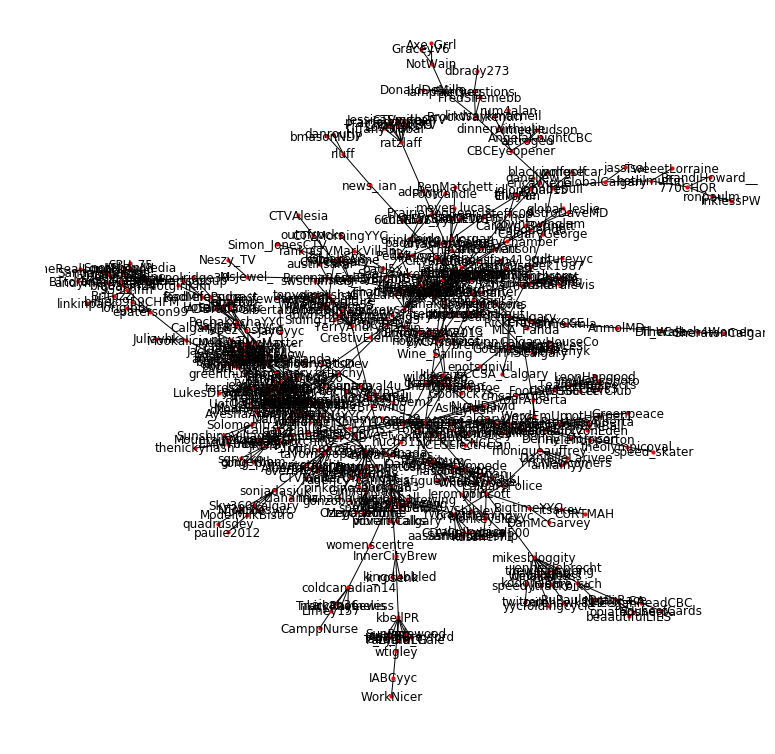

In [144]:
a=max(nx.connected_component_subgraphs(g), key=len)
plt.figure(figsize=(10,10))
nx.draw(a, node_size=10, label_size=5, with_labels=True)
plt.draw()
plt.show()

# Who is the most 'connected' node (most tagged account) 
It's the library - talk about why there's only a few (as compared to so many in the exploration stage) 

TODO: Wrap this in a widget where the users can explore the most connected tags going down from most to least popular 

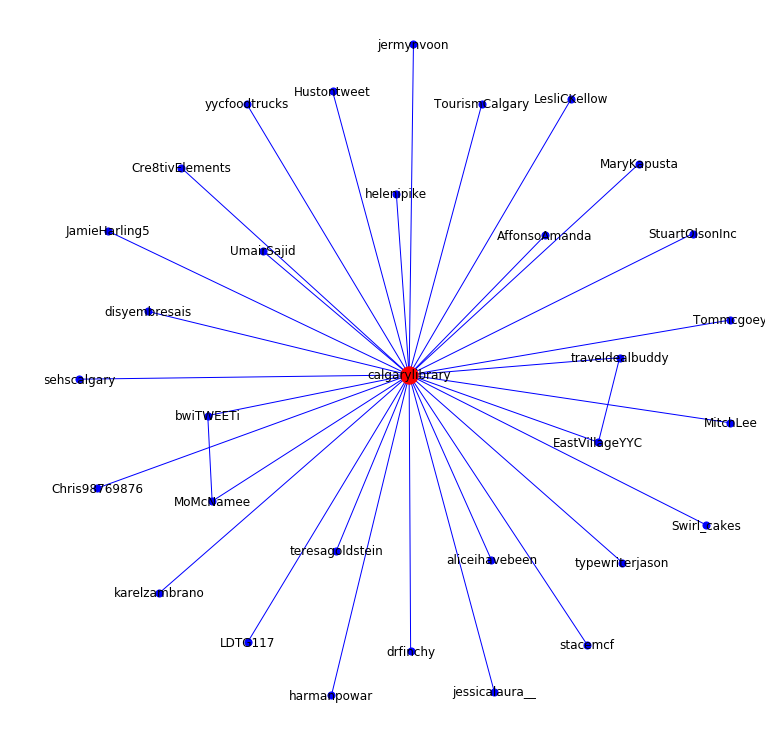

In [168]:
from operator import itemgetter
plt.figure(figsize=(10,10))
node_and_degree = g.degree()
(largest_hub, degree) = sorted(node_and_degree, key=itemgetter(1))[-1]
# Create ego graph of main hub
hub_ego = nx.ego_graph(g, largest_hub)
# Draw graph
pos = nx.spring_layout(hub_ego)
nx.draw(hub_ego, pos, node_color='b', node_size=50, with_labels=True, edge_color = 'b')
# Draw ego as large and red
nx.draw_networkx_nodes(hub_ego, pos, nodelist=[largest_hub], node_size=300, node_color='r', with_labels=True)
plt.show()

In [163]:
node_and_degree['realDonaldTrump'] 

13

# This will be a widget so people can explore most connected stuff

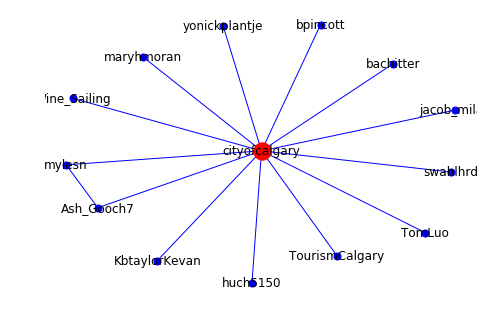

In [171]:
hub_ego = nx.ego_graph(g, 'cityofcalgary')
pos = nx.spring_layout(hub_ego)
nx.draw(hub_ego, pos, node_color='b', node_size=50, with_labels=True, edge_color = 'b')
# Draw ego as large and red
nx.draw_networkx_nodes(hub_ego,
                       pos, 
                       nodelist=['cityofcalgary'], 
                       node_size=300, 
                       node_color='r', 
                       with_labels=True)
plt.show()
